In [ ]:
#!pip install squarify

In [ ]:
#!pip install pytagcloud pygame simplejson

* 데이터 출처 : https://www.kaggle.com/irfanasrullah/groceries?select=groceries.csv

In [ ]:
#!ls

In [ ]:
import pandas as pd

In [ ]:
data = open('groceries.csv', 'r').readlines()
len(data)

9835

In [ ]:
dataset = []
for line in data:
    basket = line.replace('\n', '').split(',')
    dataset.append(basket)

len(dataset)

9835

In [ ]:
dataset[:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals']]

In [ ]:
from collections import Counter
import pytagcloud
import itertools

pygame 2.1.2 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
nouns = list(itertools.chain(*dataset))
count = Counter(nouns)
tag = count.most_common(100)
taglist = pytagcloud.make_tags(tag, maxsize=80)
pytagcloud.create_tag_image(taglist, './wordcloud.jpg', size=(1024, 768))

인기판매 상품들


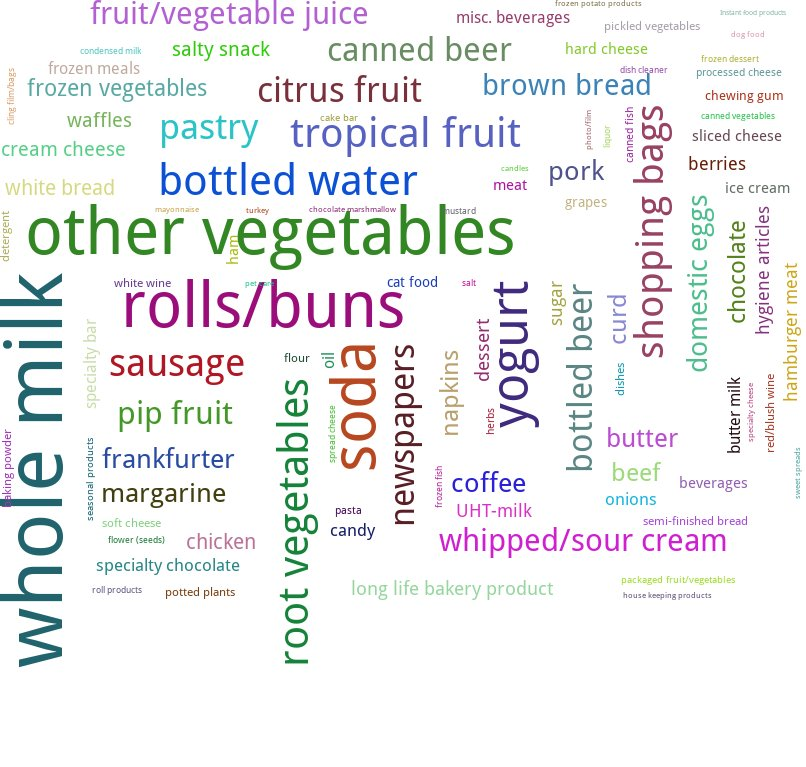

In [ ]:
from IPython.display import Image

print('인기판매 상품들')
Image('./wordcloud.jpg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_count = pd.DataFrame.from_dict(count, orient='index')
df_count.columns = ['Count']

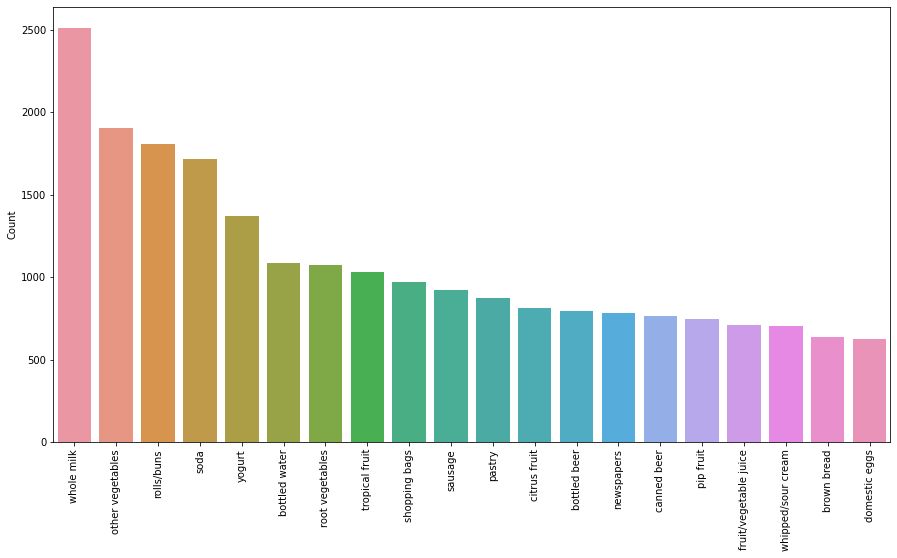

In [ ]:
import seaborn as sns

df_count = df_count.sort_values(by='Count', ascending=False)[:20]

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=df_count, x=df_count.index, y='Count');

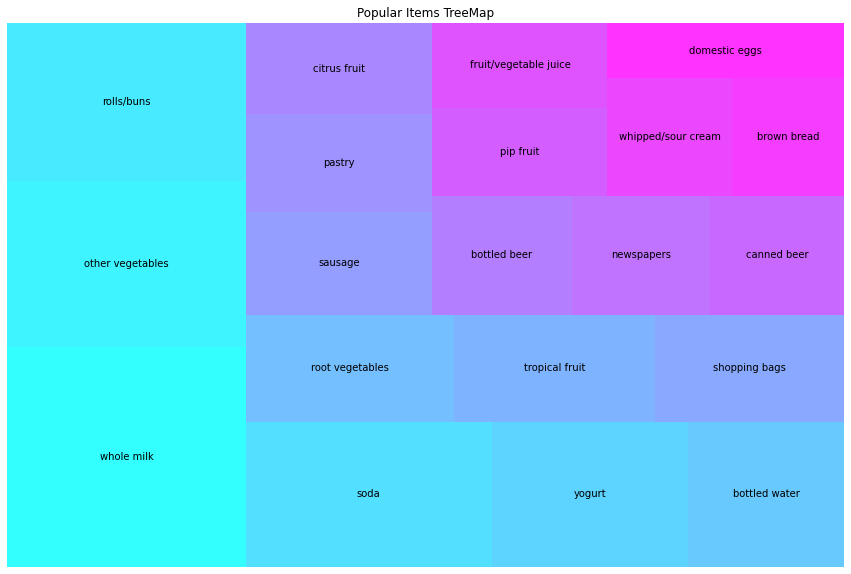

In [ ]:
import squarify

plt.figure(figsize=(15,10))
color = plt.cm.cool(np.linspace(0, 1, 20))
squarify.plot(sizes=df_count.values, label=df_count.index, alpha=0.8, color=color)

plt.title('Popular Items TreeMap')
plt.axis('off')
plt.show()

---

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [ ]:
te = TransactionEncoder()
te_data = te.fit_transform(dataset).astype('int')

df = pd.DataFrame(te_data, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_count.index

Index(['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt',
       'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags',
       'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'newspapers',
       'canned beer', 'pip fruit', 'fruit/vegetable juice',
       'whipped/sour cream', 'brown bread', 'domestic eggs'],
      dtype='object')

In [ ]:
frequent_items = apriori(df, use_colnames=True, min_support=0.01)
frequent_items

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)"
329,0.014540,"(root vegetables, whole milk, yogurt)"
330,0.010473,"(soda, yogurt, whole milk)"
331,0.015150,"(yogurt, tropical fruit, whole milk)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
2,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
4,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003
5,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
7,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015
8,"(whipped/sour cream, other vegetables)",(whole milk),0.028876,0.255516,0.014642,0.507042,1.984385,0.007263,1.510239
9,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2.0)

# 길이 정보를 갖는 열 추가
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,1
1,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,1
2,(yogurt),(berries),0.139502,0.033249,0.010574,0.075802,2.279848,0.005936,1.046043,1
3,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807,1
4,(root vegetables),(butter),0.108998,0.055414,0.012913,0.118470,2.137897,0.006873,1.071530,1
...,...,...,...,...,...,...,...,...,...,...
155,"(whipped/sour cream, whole milk)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943,2
156,"(yogurt, whole milk)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033,2
157,(whipped/sour cream),"(yogurt, whole milk)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881,1
158,(yogurt),"(whipped/sour cream, whole milk)",0.139502,0.032232,0.010880,0.077988,2.419607,0.006383,1.049627,1


In [ ]:
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
68,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,1
65,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,2
51,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,2
54,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,1
122,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206,2
123,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697,1
95,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776,1
94,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705,2
0,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,1
1,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,1
